In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import re
import statsmodels.stats.multicomp as multi
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
%matplotlib inline

In [2]:
#Read the file
df = pd.read_csv('train.csv')

In [3]:
#Head the dataframe.
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
#take a bkp after each step
df_bkp = df.copy()

In [6]:
#Now segregate the numarical and categorical columns.
ncols = df.dtypes [df.dtypes != 'object'].index
ccols = df.dtypes [df.dtypes == 'object'].index

In [7]:
#Analise numeric columns.

In [7]:
df[ncols].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [12]:
#find the missing value columns.
df[ncols].isnull().any()[df[ncols].isnull().any()]

LotFrontage    True
MasVnrArea     True
GarageYrBlt    True
dtype: bool

In [13]:
#Percentage of missingness.
for i in df[ncols].isnull().any()[df[ncols].isnull().any()].index:
        print(i,':',len(df[i].isnull()[df[i].isnull()])/len(df)*100)

LotFrontage : 17.73972602739726
MasVnrArea : 0.547945205479452
GarageYrBlt : 5.5479452054794525


In [14]:
#LotFrontage 

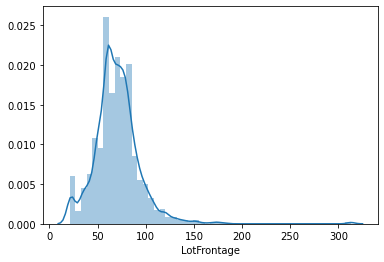

In [15]:
sns.distplot(df['LotFrontage'])

In [16]:
impute_dict = {}
impute_dict['LotFrontage'] = df['LotFrontage'].median()
impute_dict

{'LotFrontage': 69.0}

In [17]:
df['LotFrontage'].fillna(impute_dict['LotFrontage'],inplace=True)

In [14]:
#MasVnrArea

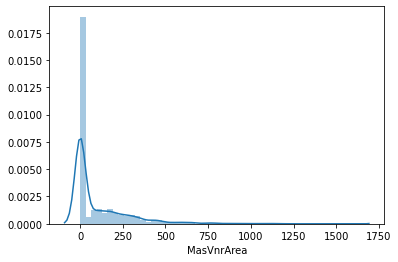

In [18]:
sns.distplot(df['MasVnrArea'])

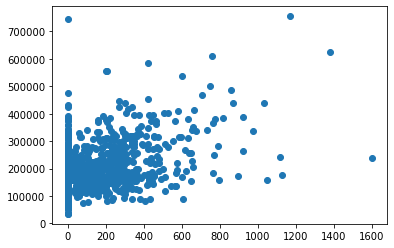

In [20]:
plt.scatter(df['MasVnrArea'],df['SalePrice'])

In [21]:
impute_dict['MasVnrArea'] = df['MasVnrArea'].median()
impute_dict

{'LotFrontage': 69.0, 'MasVnrArea': 0.0}

In [22]:
df['MasVnrArea'].fillna(impute_dict['MasVnrArea'],inplace=True)

In [23]:
#GarageYrBlt

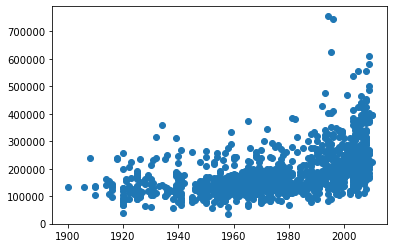

In [24]:
plt.scatter(df['GarageYrBlt'],df['SalePrice'])

In [25]:
df['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [26]:
#Lets explore more on Garage features.
#List all the garage related features.
garagecols = set()
for i in df.columns:
    if re.search('garage',i,re.IGNORECASE):
        garagecols.add(i)


In [27]:
garagecols

{'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt'}

In [28]:
df[garagecols][df['GarageYrBlt'].isnull()]

,GarageCars,GarageArea,GarageQual,GarageFinish,GarageCond,GarageType,GarageYrBlt
39,0,0,NaN,NaN,NaN,NaN,NaN
48,0,0,NaN,NaN,NaN,NaN,NaN
78,0,0,NaN,NaN,NaN,NaN,NaN
88,0,0,NaN,NaN,NaN,NaN,NaN
89,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1349,0,0,NaN,NaN,NaN,NaN,NaN
1407,0,0,NaN,NaN,NaN,NaN,NaN
1449,0,0,NaN,NaN,NaN,NaN,NaN
1450,0,0,NaN,NaN,NaN,NaN,NaN


In [29]:
#could see there are 81 observation for which all the values are missing.
#So it's better to introduce a new column 'GaragePresent' 
#and replace the missing data with 'Missing' category.

In [30]:
import math
df['GaragePresent'] = df['GarageYrBlt'].apply(lambda x : 0 if math.isnan(x) else 1)

In [31]:
df['GaragePresent'].value_counts()

1    1379
0      81
Name: GaragePresent, dtype: int64

In [32]:
#imputing with missing value.
df.loc[df[garagecols][df['GarageYrBlt'].isnull()].index,
       ['GarageType','GarageCond','GarageQual','GarageFinish']] = 'Missing'

In [33]:
df[garagecols][df['GarageYrBlt'].isnull()]

,GarageCars,GarageArea,GarageQual,GarageFinish,GarageCond,GarageType,GarageYrBlt
39,0,0,Missing,Missing,Missing,Missing,NaN
48,0,0,Missing,Missing,Missing,Missing,NaN
78,0,0,Missing,Missing,Missing,Missing,NaN
88,0,0,Missing,Missing,Missing,Missing,NaN
89,0,0,Missing,Missing,Missing,Missing,NaN
...,...,...,...,...,...,...,...
1349,0,0,Missing,Missing,Missing,Missing,NaN
1407,0,0,Missing,Missing,Missing,Missing,NaN
1449,0,0,Missing,Missing,Missing,Missing,NaN
1450,0,0,Missing,Missing,Missing,Missing,NaN


In [34]:
impute_dict['GarageYrBlt'] = df['GarageYrBlt'].min()
impute_dict

{'LotFrontage': 69.0, 'MasVnrArea': 0.0, 'GarageYrBlt': 1900.0}

In [35]:
#impute "GarageYrBlt"
df['GarageYrBlt'].fillna(impute_dict['GarageYrBlt'],inplace=True)

In [36]:
#checking if any further nulls.
df[garagecols][df['GarageYrBlt'].isnull()]

,GarageCars,GarageArea,GarageQual,GarageFinish,GarageCond,GarageType,GarageYrBlt


In [37]:
df[garagecols].isnull().any()[df[garagecols].isnull().any()]

Series([], dtype: bool)

In [38]:
#drop the Id column
df.drop('Id',axis=1,inplace=True)

In [39]:
ncols = df.dtypes [df.dtypes != 'object'].index
ccols = df.dtypes [df.dtypes == 'object'].index
df[ncols].isnull().any()[df[ncols].isnull().any()]
#no mssingnes in numeric columns.

Series([], dtype: bool)

In [40]:
#Now segregate discrete and continous 
#Once the missing values have been fixed,segregate them into discrete and continous.
ndcols = []
nccols = []
for column in ncols:
    if df[column].nunique()<20:
        ndcols.append(column)
    else:
        nccols.append(column)
        
        

In [41]:
ndcols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold',
 'YrSold',
 'GaragePresent']

In [42]:
nccols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [43]:
#to run multi collinearity function we need SalePrice column at last.
nccols.remove('SalePrice')
nccols.append('SalePrice')

In [44]:
nccols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [41]:
#lets work nccols 

In [45]:

def BivarNumToNumAnalysis(dataframe,Target_feature,Corelation_thresold):

    '''
    This function does following tasks.
    - removes the columns which are less correlated with the target.
    - check multi coliniarity and select the column which has higher correlation with the target.
    - returns correlation matrix with selected features.
    -Multicollinearity thresold is set to 80%

    - Arguments.
     .dataframe
     .Target_feature
     .Corelation_thresold
    '''
    dropped_features = []
    corr_matrix = dataframe.corr()
    SlightlycorrClms = corr_matrix[Target_feature][corr_matrix[Target_feature].abs()<Corelation_thresold].index
    corr_matrix = corr_matrix.drop(SlightlycorrClms,axis=0).drop(SlightlycorrClms,axis=1)

    
    trgttSeries = corr_matrix[Target_feature]
    for index, row in corr_matrix.iloc[:-1,:-1].iterrows():
        if index in dropped_features:
            continue
    
        for index_series in row.index:
            if abs(row[index_series])==1:
                continue
            if abs(row[index_series])>.80:
                if trgttSeries[index_series]< trgttSeries[index]:
                    dropped_features.append(index_series)
                    #print(index_series)
                    corr_matrix = corr_matrix.drop(index_series,axis=0).drop(index_series,axis=1)
                    break
    return corr_matrix

In [46]:
BivarNumToNumAnalysis(df[nccols],'SalePrice',.6)

,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
TotalBsmtSF,1.000000,0.454868,0.486665,0.613581
GrLivArea,0.454868,1.000000,0.468997,0.708624
GarageArea,0.486665,0.468997,1.000000,0.623431
SalePrice,0.613581,0.708624,0.623431,1.000000


In [47]:
nselectedcols = []
nselectedcols.extend(['TotalBsmtSF','GrLivArea','GarageArea'])


In [48]:
#drop the remaining nccols
[i for i in nccols[:-1] if i not in  nselectedcols]

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GarageYrBlt',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

In [49]:
df.drop(['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GarageYrBlt',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal'],axis=1,inplace=True)

In [50]:
#lets work on discrete variables.

In [51]:
ndcols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold',
 'YrSold',
 'GaragePresent']

In [52]:
#let's check low variance.
def low_variance_vaiables(variables,dframe,thresold_value):
    low_variance_columns = []
    for variable in variables:
        if (dframe[variable].value_counts()/len(dframe)>thresold_value).any():
            low_variance_columns.append(variable)
    return low_variance_columns

In [57]:
low_variance_vaiables(ndcols,df,.88)

['BsmtHalfBath', 'KitchenAbvGr', 'PoolArea', 'GaragePresent']

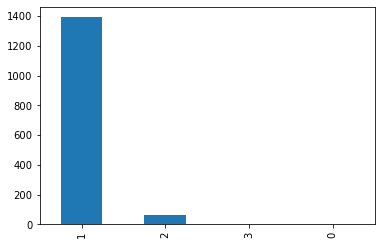

In [60]:
df['KitchenAbvGr'].value_counts().plot(kind='bar')

In [61]:
df.drop(['BsmtHalfBath', 'KitchenAbvGr', 'PoolArea'],axis=1,inplace=True)

In [62]:
ndcols = [i for i in ndcols if i not in ['BsmtHalfBath', 'KitchenAbvGr', 'PoolArea']]

In [63]:
#if the distinct group are 2 then we use ols package to check feature importance.
for i in ndcols:
    if df[i].nunique()<3:
        print(i)

GaragePresent


In [64]:
import statsmodels.formula.api as smf
ols = smf.ols(formula='SalePrice ~ C(GaragePresent)', data=df).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     86.64
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           4.63e-20
Time:                        15:59:38   Log-Likelihood:                -18502.
No. Observations:                1460   AIC:                         3.701e+04
Df Residuals:                    1458   BIC:                         3.702e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.033e+05   8578.765     12.043      0.000    8.65e+04     1.2e+05
C(GaragePresent)[T.1]  8.216e+04   8827.120      9.308      0.000    6.48e+04    9.95e+04
==============================================================================
Omnibus:                      643.100   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3986.594
Skew:                           1.962   Prob(JB):                         0.00
Kurtosis:                      10.081   Cond. No.                         8.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
nselectedcols.append('GaragePresent')


In [66]:
nselectedcols

['TotalBsmtSF', 'GrLivArea', 'GarageArea', 'GaragePresent']

In [67]:
#do pairwise annova to select discrete columns
nannovafail = set ()
nannovapass = set ()
for i in ndcols:
    if df[i].nunique()<3:
        continue
   
    mc1 = multi.MultiComparison(df['SalePrice'], df[i])
    res1 = mc1.tukeyhsd()
    reject = len(res1.reject[res1.reject==True])/len(res1.reject)
    if reject>=.5:
        nannovapass.add(i)
    else:
        nannovafail.add(i)

In [68]:
nannovapass

{'Fireplaces', 'FullBath', 'GarageCars', 'OverallQual', 'TotRmsAbvGrd'}

In [69]:
nannovafail

{'BedroomAbvGr',
 'BsmtFullBath',
 'HalfBath',
 'MSSubClass',
 'MoSold',
 'OverallCond',
 'YrSold'}

In [70]:
#drop failed cols.
df.drop(nannovafail,inplace=True,axis=1)

In [71]:
df.shape

(1460, 53)

In [72]:
#Adding to selected columns
nselectedcols.extend(nannovapass)

In [73]:
nselectedcols

['TotalBsmtSF',
 'GrLivArea',
 'GarageArea',
 'GaragePresent',
 'GarageCars',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FullBath',
 'OverallQual']

In [74]:
#lets analize categorical variables.
ccols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [75]:
#lets find the missing columns and it's percentages.
for i in ccols:
        print(i,':',len(df[i].isnull()[df[i].isnull()])/len(df)*100)

MSZoning : 0.0
Street : 0.0
Alley : 93.76712328767123
LotShape : 0.0
LandContour : 0.0
Utilities : 0.0
LotConfig : 0.0
LandSlope : 0.0
Neighborhood : 0.0
Condition1 : 0.0
Condition2 : 0.0
BldgType : 0.0
HouseStyle : 0.0
RoofStyle : 0.0
RoofMatl : 0.0
Exterior1st : 0.0
Exterior2nd : 0.0
MasVnrType : 0.547945205479452
ExterQual : 0.0
ExterCond : 0.0
Foundation : 0.0
BsmtQual : 2.5342465753424657
BsmtCond : 2.5342465753424657
BsmtExposure : 2.6027397260273974
BsmtFinType1 : 2.5342465753424657
BsmtFinType2 : 2.6027397260273974
Heating : 0.0
HeatingQC : 0.0
CentralAir : 0.0
Electrical : 0.0684931506849315
KitchenQual : 0.0
Functional : 0.0
FireplaceQu : 47.26027397260274
GarageType : 0.0
GarageFinish : 0.0
GarageQual : 0.0
GarageCond : 0.0
PavedDrive : 0.0
PoolQC : 99.52054794520548
Fence : 80.75342465753424
MiscFeature : 96.30136986301369
SaleType : 0.0
SaleCondition : 0.0


In [76]:
#Drop the columns which have more than 90% missing values.
for i in ccols:
        if len(df[i].isnull()[df[i].isnull()])/len(df)*100>=90:
            print(i)

Alley
PoolQC
MiscFeature


In [77]:
#drop the above columns.
df.drop(['Alley','PoolQC','MiscFeature'],axis=1,inplace=True)

In [78]:
df.shape

(1460, 50)

In [79]:
#bkp
df_bkp = df.copy()

In [80]:
#lets handle the remainng missing features.

In [81]:
ccols = df.dtypes[df.dtypes == 'object'].index

In [82]:
df[ccols].isnull().any()[df[ccols].isnull().any()]

MasVnrType      True
BsmtQual        True
BsmtCond        True
BsmtExposure    True
BsmtFinType1    True
BsmtFinType2    True
Electrical      True
FireplaceQu     True
Fence           True
dtype: bool

In [83]:
#lets filter all the Bsmt related columns 

Bsmtcols = []
for i in ccols:
    if re.search(r'bsmt',i,re.IGNORECASE):
        Bsmtcols.append(i)

In [84]:
Bsmtcols

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

In [85]:
df['BsmtQual'].isnull()[df['BsmtQual'].isnull()].index

Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412],
           dtype='int64')

In [86]:
df['BsmtCond'].isnull()[df['BsmtCond'].isnull()].index

Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412],
           dtype='int64')

In [87]:
df['BsmtExposure'].isnull()[df['BsmtExposure'].isnull()].index

Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  948,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179,
            1216, 1218, 1232, 1321, 1412],
           dtype='int64')

In [88]:
df['BsmtFinType1'].isnull()[df['BsmtFinType1'].isnull()].index

Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412],
           dtype='int64')

In [89]:
df['BsmtFinType2'].isnull()[df['BsmtFinType2'].isnull()].index

Int64Index([  17,   39,   90,  102,  156,  182,  259,  332,  342,  362,  371,
             392,  520,  532,  533,  553,  646,  705,  736,  749,  778,  868,
             894,  897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179,
            1216, 1218, 1232, 1321, 1412],
           dtype='int64')

In [90]:
#948,332
df[Bsmtcols].iloc[[332,948, 17,39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412],:]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
332,Gd,TA,No,GLQ,NaN
948,Gd,TA,NaN,Unf,Unf
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN


In [91]:
#We could see BsmtExposure & BsmtFinType2 are having NAN where others have info.
#But NaN says no basement. 
#Hence we also need to replace these observations with 'missing' category.

In [92]:
#updating with missng value category.
df.loc[[332,948, 17,39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
       520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
       897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
       1218, 1232, 1321, 1412],['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = 'Missing'

In [93]:
#introducing new feature 'BsmtPresent'
df['BsmtPresent'] = df['BsmtExposure'].apply(lambda x : 0 if x=='Missing' else 1)

In [94]:
df['BsmtPresent'].value_counts()

1    1421
0      39
Name: BsmtPresent, dtype: int64

In [95]:
df[ccols].isnull().any()[df[ccols].isnull().any()]

MasVnrType     True
Electrical     True
FireplaceQu    True
Fence          True
dtype: bool

In [96]:
#MasVnrType

In [97]:
df['MasVnrType'].value_counts(normalize=True)

None       0.595041
BrkFace    0.306474
Stone      0.088154
BrkCmn     0.010331
Name: MasVnrType, dtype: float64

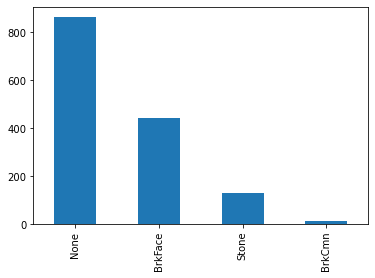

In [98]:
df['MasVnrType'].value_counts().plot(kind='bar')

C:\Users\suresha.bc\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


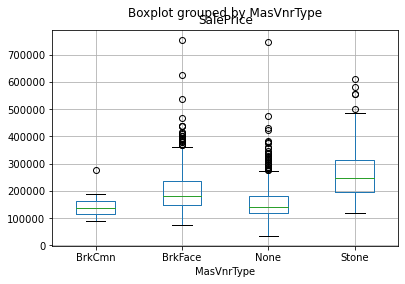

In [99]:
df.boxplot('SalePrice',by='MasVnrType')

In [100]:
df[df['MasVnrType'].isnull()].mean()

OverallQual           7.250
MasVnrType              NaN
TotalBsmtSF        1344.625
GrLivArea          1764.500
FullBath              2.000
TotRmsAbvGrd          6.625
Fireplaces            0.750
GarageCars            2.125
GarageArea          564.625
Fence                   NaN
SalePrice        236484.250
GaragePresent         1.000
BsmtPresent           1.000
dtype: float64

In [101]:
df[df['MasVnrType']=='BrkFace'].mean()

OverallQual           6.568539
TotalBsmtSF        1170.217978
GrLivArea          1645.033708
FullBath              1.705618
TotRmsAbvGrd          6.817978
Fireplaces            0.741573
GarageCars            2.017978
GarageArea          535.319101
SalePrice        204691.871910
GaragePresent         0.986517
BsmtPresent           0.984270
dtype: float64

In [102]:
df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [103]:
df['MasVnrType'].isnull()[df['MasVnrType'].isnull()]

234     True
529     True
650     True
936     True
973     True
977     True
1243    True
1278    True
Name: MasVnrType, dtype: bool

In [104]:
#Since the BrkFace mean is close to the mean of missing values 
#imputing with 'BrkFace' category.
df['MasVnrType'].fillna('BrkFace',inplace=True)

In [105]:
df.shape

(1460, 51)

In [106]:
#Electrical     

In [107]:
(df.groupby('Electrical').mean()['SalePrice']).sort_values(ascending=False)

Electrical
SBrkr    186825.113193
FuseA    122196.893617
FuseF    107675.444444
FuseP     97333.333333
Mix       67000.000000
Name: SalePrice, dtype: float64

In [108]:
df['Electrical'].isnull()[df['Electrical'].isnull()]

1379    True
Name: Electrical, dtype: bool

In [109]:
df.loc[1379]['SalePrice']

167500

In [110]:
len(df['Electrical'].isnull()[df['Electrical'].isnull()])/len(df)

0.0006849315068493151

In [111]:
#one missing obeservation so replacing with the closest mean category.

In [113]:
(df.groupby('Electrical').mean()['SalePrice']).sort_values(ascending=False)
electric_miss_value = 'SBrkr'
electric_miss_value

'SBrkr'

In [114]:
df['Electrical'].fillna(electric_miss_value,inplace=True)

In [115]:
df[ccols].isnull().any()[df[ccols].isnull().any()]

FireplaceQu    True
Fence          True
dtype: bool

In [116]:
#FireplaceQu 

In [117]:
df['FireplaceQu'].isnull()[df['FireplaceQu'].isnull()]

0       True
5       True
10      True
12      True
15      True
        ... 
1452    True
1453    True
1454    True
1458    True
1459    True
Name: FireplaceQu, Length: 690, dtype: bool

In [118]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [119]:
#We can see that NA means no 'FireplaceQu'.
#So let's replace it with 'No' category.

In [120]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [121]:
pd.Series(df.groupby('FireplaceQu').mean()['SalePrice']).sort_values(ascending=False)

FireplaceQu
Ex    337712.500000
Gd    226351.415789
TA    205723.488818
Fa    167298.484848
Po    129764.150000
Name: SalePrice, dtype: float64

In [122]:
df[ccols].isnull().any()[df[ccols].isnull().any()]

FireplaceQu    True
Fence          True
dtype: bool

In [123]:
#Fence

In [124]:
df['Fence'].isnull()[df['Fence'].isnull()]

0       True
1       True
2       True
3       True
4       True
        ... 
1453    True
1454    True
1455    True
1458    True
1459    True
Name: Fence, Length: 1179, dtype: bool

In [125]:
#here NA means no Fence.
#lets deode it with 'No' category.

In [126]:
df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [127]:
df.fillna('No',inplace=True)

In [128]:
df['Fence'].value_counts()

No       1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [129]:
pd.Series(df.groupby('Fence').mean()['SalePrice']).sort_values(ascending=False)

Fence
No       187596.837998
GdPrv    178927.457627
MnPrv    148751.089172
GdWo     140379.314815
MnWw     134286.363636
Name: SalePrice, dtype: float64

In [130]:
df['Fence'].value_counts()/len(df)

No       0.807534
MnPrv    0.107534
GdPrv    0.040411
GdWo     0.036986
MnWw     0.007534
Name: Fence, dtype: float64

In [131]:
df.isnull().any()[df.isnull().any()]

Series([], dtype: bool)

In [132]:
#All the missied values are fixed.
df.shape

(1460, 51)

In [133]:
len(ccols)

40

In [134]:
ccols = df.dtypes[df.dtypes=='object'].index

In [136]:
#lets check low variance columns
low_variance_vaiables(ccols,df,.89)

['Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'BsmtCond',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive']

In [137]:
df.drop(['Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'BsmtCond',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive'],axis=True,inplace=True)

In [138]:
ccols = df.dtypes[df.dtypes=='object'].index
df.shape

(1460, 37)

In [139]:
##lets do multi annova test.
cannovafail = set ()
cannovapass = set ()
for i in ccols:
    if df[i].nunique()<3:
        print('simple annova:',i)
        continue
   
    mc1 = multi.MultiComparison(df['SalePrice'], df[i])
    res1 = mc1.tukeyhsd()
    reject = len(res1.reject[res1.reject==True])/len(res1.reject)
    if reject>=.5:
        cannovapass.add(i)
    else:
        cannovafail.add(i)

In [140]:
cannovapass

{'BldgType',
 'BsmtExposure',
 'BsmtQual',
 'ExterQual',
 'FireplaceQu',
 'GarageFinish',
 'GarageType',
 'KitchenQual',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'Neighborhood'}

In [141]:
cannovafail

{'BsmtFinType1',
 'BsmtFinType2',
 'Condition1',
 'ExterCond',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'Foundation',
 'HeatingQC',
 'HouseStyle',
 'LotConfig',
 'RoofStyle',
 'SaleCondition',
 'SaleType'}

In [142]:
df.drop(cannovafail,axis=1,inplace=True)
df.shape

(1460, 23)

In [143]:
ccols = df.dtypes[df.dtypes=='object'].index

In [144]:
ncols = df.dtypes[df.dtypes!='object'].index

In [145]:
ncols

Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'SalePrice', 'GaragePresent',
       'BsmtPresent'],
      dtype='object')

In [146]:
ccols

Index(['MSZoning', 'LotShape', 'Neighborhood', 'BldgType', 'MasVnrType',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'KitchenQual', 'FireplaceQu',
       'GarageType', 'GarageFinish'],
      dtype='object')

In [147]:
len(ccols)

12

In [148]:
len(ncols)

11

In [149]:
df.shape

(1460, 23)

In [150]:
#Label
#['ExterQual','BsmtQual','BsmtExposure','KitchenQual','FireplaceQu','GarageFinish']
#One
#['LotShape','BldgType','MasVnrType','GarageType','MSZoning','Neighborhood']
#yet to decide


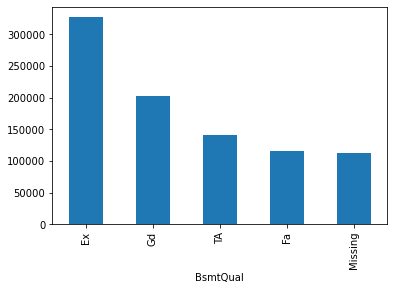

In [151]:
(df.groupby('BsmtQual').mean()['SalePrice']).sort_values(ascending=False).plot(kind='bar')

In [152]:
df.shape

(1460, 23)

In [153]:
#lets keep this section and do it to check whaether this increase or decrease the mdoel perfomence.
#Lets handle Rare categories.
#df['MSZoning'].value_counts()/len(df)
#Keep the outlier and normalization aside till the model deployement lets see later if it increase the
#performence or not.

In [154]:
#for i in ccols:
 ##   print(df[i].value_counts()/len(df))

In [155]:
df_bkp = df.copy()

In [156]:
df.shape

(1460, 23)

In [157]:
# for one hot encoding with feature-engine
from feature_engine.categorical_encoders import OneHotCategoricalEncoder

In [158]:
ohe_enc = OneHotCategoricalEncoder(
    top_categories=None,
    variables=['LotShape','BldgType','MasVnrType','GarageType','MSZoning','Neighborhood'], # we can select which variables to encode
    drop_last=True) # to return k-1, false to return k

In [159]:
ohe_enc.fit(df)

OneHotCategoricalEncoder(drop_last=True,
                         variables=['LotShape', 'BldgType', 'MasVnrType',
                                    'GarageType', 'MSZoning', 'Neighborhood'])

In [160]:
ohe_enc.variables

['LotShape',
 'BldgType',
 'MasVnrType',
 'GarageType',
 'MSZoning',
 'Neighborhood']

In [161]:
tmp = ohe_enc.transform(df)

tmp.head()

,OverallQual,ExterQual,BsmtQual,BsmtExposure,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,...,Neighborhood_MeadowV,Neighborhood_Edwards,Neighborhood_Timber,Neighborhood_Gilbert,Neighborhood_StoneBr,Neighborhood_ClearCr,Neighborhood_NPkVill,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_SWISU
0,7,Gd,Gd,No,856,1710,2,Gd,8,0,...,0,0,0,0,0,0,0,0,0,0
1,6,TA,Gd,Gd,1262,1262,2,TA,6,1,...,0,0,0,0,0,0,0,0,0,0
2,7,Gd,Gd,Mn,920,1786,2,Gd,6,1,...,0,0,0,0,0,0,0,0,0,0
3,7,TA,TA,No,756,1717,1,Gd,7,1,...,0,0,0,0,0,0,0,0,0,0
4,8,Gd,Gd,Av,1145,2198,2,Gd,9,1,...,0,0,0,0,0,0,0,0,0,0


In [162]:
#Label encoding
from feature_engine.categorical_encoders import OrdinalCategoricalEncoder

In [163]:
ordinal_enc = OrdinalCategoricalEncoder(
    encoding_method='arbitrary',
    variables=['ExterQual','BsmtQual','BsmtExposure','KitchenQual','FireplaceQu','GarageFinish'])



In [164]:
ordinal_enc.fit(tmp)

OrdinalCategoricalEncoder(encoding_method='arbitrary',
                          variables=['ExterQual', 'BsmtQual', 'BsmtExposure',
                                     'KitchenQual', 'FireplaceQu',
                                     'GarageFinish'])

In [165]:
ordinal_enc.encoder_dict_

{'ExterQual': {'Gd': 0, 'TA': 1, 'Ex': 2, 'Fa': 3},
 'BsmtQual': {'Gd': 0, 'TA': 1, 'Ex': 2, 'Missing': 3, 'Fa': 4},
 'BsmtExposure': {'No': 0, 'Gd': 1, 'Mn': 2, 'Av': 3, 'Missing': 4},
 'KitchenQual': {'Gd': 0, 'TA': 1, 'Ex': 2, 'Fa': 3},
 'FireplaceQu': {'No': 0, 'TA': 1, 'Gd': 2, 'Fa': 3, 'Ex': 4, 'Po': 5},
 'GarageFinish': {'RFn': 0, 'Unf': 1, 'Fin': 2, 'Missing': 3}}

In [166]:
ordinal_enc.variables

['ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'KitchenQual',
 'FireplaceQu',
 'GarageFinish']

In [167]:
tmp = ordinal_enc.transform(tmp)

In [168]:
tmp.head()

,OverallQual,ExterQual,BsmtQual,BsmtExposure,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,...,Neighborhood_MeadowV,Neighborhood_Edwards,Neighborhood_Timber,Neighborhood_Gilbert,Neighborhood_StoneBr,Neighborhood_ClearCr,Neighborhood_NPkVill,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_SWISU
0,7,0,0,0,856,1710,2,0,8,0,...,0,0,0,0,0,0,0,0,0,0
1,6,1,0,1,1262,1262,2,1,6,1,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,2,920,1786,2,0,6,1,...,0,0,0,0,0,0,0,0,0,0
3,7,1,1,0,756,1717,1,0,7,1,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,3,1145,2198,2,0,9,1,...,0,0,0,0,0,0,0,0,0,0


In [169]:
len(tmp.dtypes[tmp.dtypes!='object'])

61

In [170]:
 model = LinearRegression()

In [171]:
len(tmp.columns)

61

In [172]:
features = ['OverallQual', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'TotalBsmtSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea', 'SalePrice',
       'GaragePresent', 'BsmtPresent', 'LotShape_Reg', 'LotShape_IR1',
       'LotShape_IR2', 'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex',
       'BldgType_TwnhsE', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'GarageType_Attchd', 'GarageType_Detchd',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Missing',
       'GarageType_Basment', 'MSZoning_RL', 'MSZoning_RM', 'MSZoning_C (all)',
       'MSZoning_FV', 'Neighborhood_CollgCr', 'Neighborhood_Veenker',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_Mitchel',
       'Neighborhood_Somerst', 'Neighborhood_NWAmes', 'Neighborhood_OldTown',
       'Neighborhood_BrkSide', 'Neighborhood_Sawyer', 'Neighborhood_NridgHt',
       'Neighborhood_NAmes', 'Neighborhood_SawyerW', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Edwards', 'Neighborhood_Timber',
       'Neighborhood_Gilbert', 'Neighborhood_StoneBr', 'Neighborhood_ClearCr',
       'Neighborhood_NPkVill', 'Neighborhood_Blmngtn', 'Neighborhood_BrDale',
       'Neighborhood_SWISU']

In [173]:
features.remove('SalePrice')

In [174]:
len(features)

60

In [175]:
target = 'SalePrice'

In [176]:
X = tmp[features].values

In [177]:
y = tmp[target].values

In [178]:
X.shape

(1460, 60)

In [179]:
y.shape

(1460,)

In [180]:
model.fit(X,y)

LinearRegression()

In [181]:
model.score(X,y)

0.837351731547011

In [182]:
#Lets do rare category encoding using feature engineering.
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder

In [183]:
#Rare value encoder
rare_encoder = RareLabelCategoricalEncoder(
    tol=0.03,  # minimal percentage to be considered non-rare
    n_categories=4, # minimal number of categories the variable should have to re-cgroup rare categories
    variables=ccols.to_list() # variables to re-group
)  

In [184]:
rare_encoder.fit(df)

C:\Users\suresha.bc\AppData\Roaming\Python\Python37\site-packages\feature_engine\categorical_encoders.py:719: UserWarning: The number of unique categories for variable LotShape is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "n_categories. Thus, all categories will be considered frequent".format(var))
C:\Users\suresha.bc\AppData\Roaming\Python\Python37\site-packages\feature_engine\categorical_encoders.py:719: UserWarning: The number of unique categories for variable MasVnrType is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "n_categories. Thus, all categories will be considered frequent".format(var))
C:\Users\suresha.bc\AppData\Roaming\Python\Python37\site-packages\feature_engine\categorical_encoders.py:719: UserWarning: The number of unique categories for variable ExterQual is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "n_categories. Thus, a

RareLabelCategoricalEncoder(n_categories=4, tol=0.03,
                            variables=['MSZoning', 'LotShape', 'Neighborhood',
                                       'BldgType', 'MasVnrType', 'ExterQual',
                                       'BsmtQual', 'BsmtExposure',
                                       'KitchenQual', 'FireplaceQu',
                                       'GarageType', 'GarageFinish'])

In [185]:
rare_encoder.variables

['MSZoning',
 'LotShape',
 'Neighborhood',
 'BldgType',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

In [186]:
tmp_rare = rare_encoder.transform(df)

In [187]:
tmp_rare

,MSZoning,LotShape,Neighborhood,BldgType,OverallQual,MasVnrType,ExterQual,BsmtQual,BsmtExposure,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,SalePrice,GaragePresent,BsmtPresent
0,RL,Reg,CollgCr,1Fam,7,BrkFace,Gd,Gd,No,856,...,8,0,No,Attchd,RFn,2,548,208500,1,1
1,RL,Reg,Rare,1Fam,6,None,TA,Gd,Gd,1262,...,6,1,TA,Attchd,RFn,2,460,181500,1,1
2,RL,IR1,CollgCr,1Fam,7,BrkFace,Gd,Gd,Mn,920,...,6,1,TA,Attchd,RFn,2,608,223500,1,1
3,RL,IR1,Crawfor,1Fam,7,None,TA,TA,No,756,...,7,1,Gd,Detchd,Unf,3,642,140000,1,1
4,RL,IR1,Rare,1Fam,8,BrkFace,Gd,Gd,Av,1145,...,9,1,TA,Attchd,RFn,3,836,250000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Gilbert,1Fam,6,None,TA,Gd,No,953,...,7,1,TA,Attchd,RFn,2,460,175000,1,1
1456,RL,Reg,NWAmes,1Fam,6,Stone,TA,Gd,No,1542,...,7,2,TA,Attchd,Unf,2,500,210000,1,1
1457,RL,Reg,Crawfor,1Fam,7,None,Ex,TA,No,1152,...,9,2,Gd,Attchd,RFn,1,252,266500,1,1
1458,RL,Reg,NAmes,1Fam,5,None,TA,TA,Mn,1078,...,5,0,No,Attchd,Unf,1,240,142125,1,1


In [188]:
tmp_rare_bkp = tmp_rare.copy()

In [189]:
tmp_rare['Neighborhood'].value_counts()/len(df)

Rare       0.182192
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
Name: Neighborhood, dtype: float64

In [190]:
#lets encode again.
ohe_enc1 = OneHotCategoricalEncoder(
    top_categories=None,
    variables=['LotShape','BldgType','MasVnrType','GarageType','MSZoning','Neighborhood'], # we can select which variables to encode
    drop_last=True) # to return k-1, false to return k

In [191]:
ohe_enc1.fit(tmp_rare)


OneHotCategoricalEncoder(drop_last=True,
                         variables=['LotShape', 'BldgType', 'MasVnrType',
                                    'GarageType', 'MSZoning', 'Neighborhood'])

In [192]:
ohe_enc1.variables


['LotShape',
 'BldgType',
 'MasVnrType',
 'GarageType',
 'MSZoning',
 'Neighborhood']

In [193]:
tmp_rare = ohe_enc1.transform(tmp_rare)


In [194]:
tmp_rare.head()

,OverallQual,ExterQual,BsmtQual,BsmtExposure,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,...,Neighborhood_Mitchel,Neighborhood_Somerst,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_BrkSide,Neighborhood_Sawyer,Neighborhood_NridgHt,Neighborhood_NAmes,Neighborhood_SawyerW,Neighborhood_Edwards
0,7,Gd,Gd,No,856,1710,2,Gd,8,0,...,0,0,0,0,0,0,0,0,0,0
1,6,TA,Gd,Gd,1262,1262,2,TA,6,1,...,0,0,0,0,0,0,0,0,0,0
2,7,Gd,Gd,Mn,920,1786,2,Gd,6,1,...,0,0,0,0,0,0,0,0,0,0
3,7,TA,TA,No,756,1717,1,Gd,7,1,...,0,0,0,0,0,0,0,0,0,0
4,8,Gd,Gd,Av,1145,2198,2,Gd,9,1,...,0,0,0,0,0,0,0,0,0,0


In [195]:
#Label encoding
from feature_engine.categorical_encoders import OrdinalCategoricalEncoder


ordinal_enc1 = OrdinalCategoricalEncoder(
    encoding_method='arbitrary',
    variables=['ExterQual','BsmtQual','BsmtExposure','KitchenQual','FireplaceQu','GarageFinish'])


In [196]:
ordinal_enc1.fit(tmp_rare)

OrdinalCategoricalEncoder(encoding_method='arbitrary',
                          variables=['ExterQual', 'BsmtQual', 'BsmtExposure',
                                     'KitchenQual', 'FireplaceQu',
                                     'GarageFinish'])

In [197]:
ordinal_enc1.encoder_dict_

{'ExterQual': {'Gd': 0, 'TA': 1, 'Ex': 2, 'Fa': 3},
 'BsmtQual': {'Gd': 0, 'TA': 1, 'Ex': 2, 'Rare': 3},
 'BsmtExposure': {'No': 0, 'Gd': 1, 'Mn': 2, 'Av': 3, 'Rare': 4},
 'KitchenQual': {'Gd': 0, 'TA': 1, 'Ex': 2, 'Fa': 3},
 'FireplaceQu': {'No': 0, 'TA': 1, 'Gd': 2, 'Rare': 3},
 'GarageFinish': {'RFn': 0, 'Unf': 1, 'Fin': 2, 'Missing': 3}}

In [198]:
ordinal_enc1.variables

['ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'KitchenQual',
 'FireplaceQu',
 'GarageFinish']

In [199]:
tmp_rare = ordinal_enc1.transform(tmp_rare)

In [200]:
model1 = LinearRegression()

In [201]:
tmp_rare.columns

Index(['OverallQual', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'TotalBsmtSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea', 'SalePrice',
       'GaragePresent', 'BsmtPresent', 'LotShape_Reg', 'LotShape_IR1',
       'LotShape_IR2', 'BldgType_1Fam', 'BldgType_Rare', 'BldgType_Duplex',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_BuiltIn',
       'GarageType_Rare', 'MSZoning_RL', 'MSZoning_RM', 'MSZoning_Rare',
       'Neighborhood_CollgCr', 'Neighborhood_Rare', 'Neighborhood_Crawfor',
       'Neighborhood_Mitchel', 'Neighborhood_Somerst', 'Neighborhood_NWAmes',
       'Neighborhood_OldTown', 'Neighborhood_BrkSide', 'Neighborhood_Sawyer',
       'Neighborhood_NridgHt', 'Neighborhood_NAmes', 'Neighborhood_SawyerW',
       'Neighborhood_Edwards'],
      dtype='object')

In [202]:
X = (tmp_rare.loc[:,tmp_rare.columns!='SalePrice']).values

In [203]:
X.shape

(1460, 45)

In [204]:
y = tmp_rare['SalePrice'].values

In [205]:
model1.fit(X,y)

LinearRegression()

In [206]:
model1.score(X,y)

0.8201390753089508

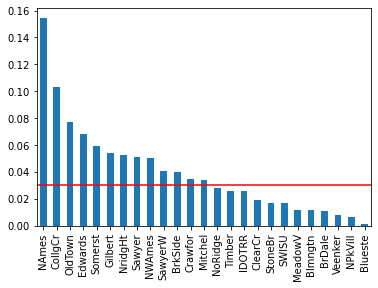

In [207]:
fig = df_bkp['Neighborhood'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar')
fig.plot()
plt.axhline(.03,color='r')

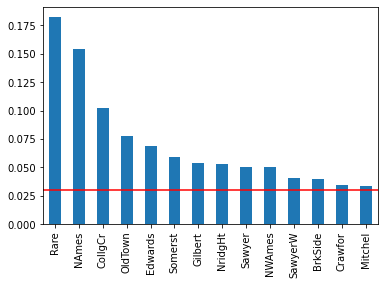

In [208]:
fig = tmp_rare_bkp['Neighborhood'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar')
fig.plot()
plt.axhline(.03,color='r')

In [209]:
##lets do multi annova test.
cannovafail = set ()
cannovapass = set ()
for i in ['LandSlope']:
    if df[i].nunique()<3:
        print('simple annova:',i)
        continue
   
    mc1 = multi.MultiComparison(df['SalePrice'], df[i])
    res1 = mc1.tukeyhsd()
    reject = len(res1.reject[res1.reject==True])/len(res1.reject)
    
    if reject>=.5:
        cannovapass.add(i)
    else:
        cannovafail.add(i)

KeyError: 'LandSlope'

In [233]:
cannovapass

set()

In [234]:
cannovafail

{'LandSlope'}

In [223]:
mc1 = multi.MultiComparison(df['SalePrice'], df['LandSlope'])

In [224]:
res1 = mc1.tukeyhsd()

In [225]:
res1.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Gtl,Mod,16777.3389,0.2194,-6862.496,40417.1738,False
Gtl,Sev,24422.4312,0.5121,-27479.3521,76324.2145,False
Mod,Sev,7645.0923,0.9,-48944.9242,64235.1088,False


In [231]:
len(res1.reject[res1.reject==True])/len(res1.reject)>.5

False

In [228]:
len(res1.reject)

3